In [122]:
import numpy as np
import pandas as pd
from fastai.tabular import *

In [123]:
# !git clone https://github.com/victorian177/Linear-Regression---GPA-Predictor.git

In [124]:
pth = "/content/Linear-Regression---GPA-Predictor/Linear Regression - GPA Predictor/"
dataset_length = 5000

dataset = pd.read_csv(f"{pth}gpa_train_{dataset_length}_scores.csv")
dataset.drop("Unnamed: 0", axis=1, inplace=True)

test = pd.read_csv(f"{pth}gpa_test_scores.csv")
test.drop("Unnamed: 0", axis=1, inplace=True)



In [125]:
continuous_vars = list(dataset.columns)
continuous_vars.remove('gpa')
dependent_var = 'gpa'

processes = [Normalize]

start_indx = len(dataset) - int(len(dataset) * 0.2)
end_indx = len(dataset)

validation = (TabularList.from_df(dataset.iloc[start_indx:end_indx].copy(), path=pth, cont_names=continuous_vars))
test_data = (TabularList.from_df(test, path=pth, cont_names=continuous_vars, procs=processes))

data = (TabularList.from_df(dataset, path=pth, cont_names=continuous_vars, procs=processes)
                           .split_by_idx(list(range(start_indx,end_indx)))
                           .label_from_df(cols=dependent_var)
                           .add_test(test_data)
                           .databunch())


In [126]:
data.show_batch(rows=10)

CHE 201,MTH 201,MEE 203,MEE 205,CSC 201,EEE 203,EEE 291,MSE 201,target
0.6883,-1.0845,-0.8026,-0.4419,-0.8480,-1.1713,0.5395,1.6279,1.8181819
-0.0735,0.5034,1.6097,-0.7309,-1.2336,-0.4922,-0.8681,-0.6861,2.1363637
-1.2639,1.6102,1.2237,1.7256,-0.1734,1.5450,1.0734,-1.1200,3.3636363
-1.3116,-1.4213,1.1273,-1.2126,1.1278,1.1085,1.1705,0.5673,2.590909
1.2597,-0.7477,1.1755,1.7256,-0.0770,1.6906,0.1997,0.1816,3.6818182
0.3550,1.3696,-0.4649,-0.3456,-0.3179,0.5749,1.5102,1.0976,3.6363637
-1.5020,-1.1807,1.1273,-0.3938,-1.4745,0.9145,1.6558,0.2780,2.1818182
0.9264,1.2733,-0.8509,0.1361,1.6097,0.6719,-0.3342,0.1334,3.7272727
-0.0259,0.5515,-0.1754,0.5696,0.3086,-0.2982,-0.4313,-0.4933,3.1363637
-1.4068,0.4553,0.4036,0.5214,0.1640,1.3510,0.1997,-1.6021,2.909091


In [127]:
learn = tabular_learner(data, layers=[300, 200, 100, 50], metrics= [rmse,r2_score])
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (4000 items)
x: TabularList
CHE 201 0.5455; MTH 201 -0.7958; MEE 203 -0.1754; MEE 205 -0.9236; CSC 201 1.1278; EEE 203 0.5749; EEE 291 1.0734; MSE 201 0.7119; ,CHE 201 1.5454; MTH 201 -0.5071; MEE 203 -0.8026; MEE 205 1.5811; CSC 201 1.3688; EEE 203 -0.2982; EEE 291 1.2190; MSE 201 1.2422; ,CHE 201 1.0693; MTH 201 0.7440; MEE 203 0.4036; MEE 205 0.4251; CSC 201 1.4170; EEE 203 0.4779; EEE 291 -0.6255; MSE 201 1.5797; ,CHE 201 -0.2164; MTH 201 1.7064; MEE 203 0.6930; MEE 205 0.6178; CSC 201 0.7905; EEE 203 -1.0743; EEE 291 0.4424; MSE 201 -1.6503; ,CHE 201 -1.3592; MTH 201 -1.0845; MEE 203 -1.5263; MEE 205 -1.1163; CSC 201 0.5013; EEE 203 0.4294; EEE 291 -0.0430; MSE 201 -1.2164; 
y: FloatList
2.9545455,3.590909,4.4545455,3.1818182,1.2272727
Path: /content/Linear-Regression---GPA-Predictor/Linear Regression - GPA Predictor;

Valid: LabelList (1000 items)
x: TabularList
CHE 201 -0.0259; MTH 201 1.2733; MEE 20

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


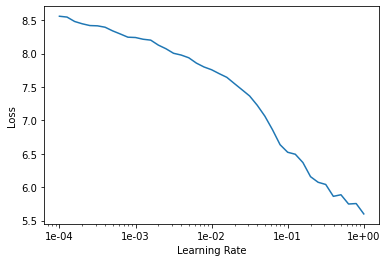

In [128]:
learn.lr_find(start_lr = 1e-05,end_lr = 1e+05, num_it = 100)
learn.recorder.plot()

In [129]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,root_mean_squared_error,r2_score,time
0,7.445039,7.171751,2.677760,-12.406055,00:00
1,7.270699,7.298469,2.701349,-12.652607,00:00
2,7.008574,6.758294,2.599487,-11.637645,00:00
3,6.668185,6.408282,2.531272,-10.987109,00:01
4,6.079412,5.552436,2.356125,-9.384214,00:00
5,5.210410,4.435083,2.105828,-7.300740,00:01
6,3.967656,2.900622,1.702885,-4.423234,00:00
7,2.459717,1.246031,1.115907,-1.334299,00:01
8,1.137892,0.270643,0.519421,0.491999,00:00
9,0.424413,0.062162,0.248266,0.884157,00:00


In [130]:
learn.show_results(ds_type=DatasetType.Train,rows = 20)

CHE 201,MTH 201,MEE 203,MEE 205,CSC 201,EEE 203,EEE 291,MSE 201,target,prediction
0.4026,1.2252,0.5483,-0.8273,1.0796,-1.3654,-1.2564,1.0494,3.1818182,[3.207925]
-1.6925,0.5997,1.4650,0.8104,0.0676,-1.0258,1.6558,1.0976,3.1818182,[3.189893]
-0.4545,0.7921,0.6930,1.0513,1.5615,0.2839,1.3646,-1.5539,3.7727273,[3.722852]
-1.6925,0.4553,-0.3201,-1.2608,-1.5709,-1.1713,-0.9167,-0.9754,0.90909094,[1.083948]
-0.2640,-0.3627,0.7413,-0.6346,1.5615,-0.4437,0.1026,0.9048,3.1363637,[3.072797]
-1.3116,1.5139,-1.4298,-0.8754,1.6579,-1.4139,-1.0623,0.7601,2.2727273,[2.191957]
1.5930,-0.7477,1.4167,1.4366,-0.5589,1.5935,0.5395,1.6761,3.6818182,[3.718134]
1.5454,0.5515,-0.2236,-0.2011,1.7061,1.6421,0.2482,1.5797,4.318182,[4.197041]
0.2598,0.7440,-0.5131,-0.9718,0.5013,-0.7833,-0.4313,1.4833,2.9545455,[2.929655]
-0.9782,-1.1807,1.6580,1.4848,0.4049,-1.2199,0.0055,-1.1200,1.8181819,[1.814898]


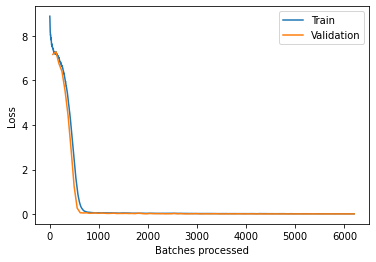

In [131]:
learn.recorder.plot_losses()

In [137]:
test_predictions = learn.get_preds(ds_type=DatasetType.Test)
# test_predictions = [float(i[0]) for i in test_predictions]

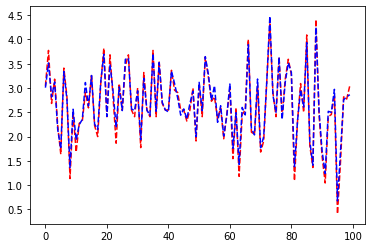

In [144]:
plt.plot(list(test['gpa']), 'r--', test_predictions[0], 'b--')
plt.show()

In [145]:
test_list = list(test['gpa'])

sum_ = 0
for i in range(len(test_predictions[0])):
  diff = float(test_predictions[0][i]) - test_list[i]
  sqr_diff = diff ** 2
  sum_ += sqr_diff

sum_


1.4054645057688442